In [266]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [267]:
import numpy as np
import pandas as pd

In [268]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [269]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [270]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [271]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [272]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [273]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [274]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [275]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [276]:
# Use Inspector to print the column names and types for measurement table
measurement_columns = inspector.get_columns('measurement')
for c in measurement_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [277]:
# Use Inspector to print the column names and types for station table
station_columns = inspector.get_columns('station')
for c in station_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [278]:
# Use `engine.execute` to select and display the first 10 rows from the measurement table

engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [298]:
# Use `engine.execute` to select and display the first 10 rows from the station table

engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [279]:
#use query below to find out what the last date in data set is 
last_date = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()
#last_date[0:10]
last_date

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [288]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. Using in dates from 8/23/2016
#filter out none values
#sorted by measurement date
year_ago_date = dt.datetime(2016, 8, 22)
results = session.query(Measurement.date,Measurement.prcp)\
    .filter(Measurement.date > year_ago_date,Measurement.prcp != "None").order_by(Measurement.date).all()
results

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [289]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(results, columns = ["Date", "Precipitation"])
precipitation_df.set_index("Date", inplace=True)
#created a sorted data frame by Precipitation
sorted_df = precipitation_df.sort_values(by='Precipitation', ascending=False)

sorted_df.head()

,Precipitation
Date,
2016-09-14,6.70
2017-04-29,6.25
2017-02-11,5.04
2017-07-22,4.00
2016-10-04,3.46


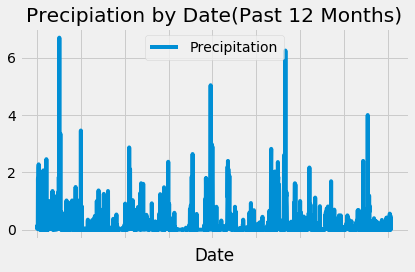

In [290]:
# Use Pandas Plotting with Matplotlib to plot the data
#need to add headers and table title#
precipitation_df.plot.line()
plt.title("Precipiation by Date(Past 12 Months)")
plt.tight_layout()
plt.show()


In [283]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [218]:
# Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
stmt = session.query(Measurement).statement
measurement_df = pd.read_sql_query(stmt, session.bind)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [293]:
list_stations = measurement_df['station'].unique()
print(list_stations)

['USC00519397' 'USC00513117' 'USC00514830' 'USC00517948' 'USC00518838'
 'USC00519523' 'USC00519281' 'USC00511918' 'USC00516128']


In [219]:
# Design a query to show how many stations are available in this dataset?
# Station gives us a count , and we find that there are (9) stations available in the data set
num_stations = measurement_df.station.nunique()
print(f'There are {num_stations} stations available in the measurement dataset.')

There are 9 stations available in the measurement dataset.


In [226]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity =pd.DataFrame( measurement_df.groupby('station').station.count())
station_activity = station_activity.rename(columns={'station': 'Station Count'})
station_activity = station_activity.sort_values(by='Station Count', ascending=False)
station_activity


,Station Count
station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [227]:
max_count = station_activity["Station Count"].max()
print(f'Station USC00519281 has the most activity at {max_count}.')

Station USC00519281 has the most activity at 2772.


In [201]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [Measurement.station, 
       func.count(Measurement.station),
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
station_overview = session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
#created a table with a min/max/average temp overview for each station, in descending order by observation count
station_overview_df = pd.DataFrame(station_overview, columns=['Station', "Station Count", 'Min Temp', 'Max Temp', 'Average Temp'])
station_overview_df

,Station,Station Count,Min Temp,Max Temp,Average Temp
0,USC00519281,2772,54.0,85.0,71.663781
1,USC00519397,2724,56.0,87.0,74.553231
2,USC00513117,2709,59.0,85.0,72.689184
3,USC00519523,2669,56.0,85.0,74.543649
4,USC00516128,2612,58.0,84.0,70.915008
5,USC00514830,2202,58.0,85.0,74.873297
6,USC00511918,1979,53.0,87.0,71.615968
7,USC00517948,1372,58.0,87.0,74.684402
8,USC00518838,511,58.0,83.0,72.724070


In [231]:
# Choose the station with the highest number of temperature observations.
# highest observations are from Station USC00519281 as seen in chart above
# use year_ago_date variable created earlier, 8-22-16
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
            filter_by(station = 'USC00519281').filter(Measurement.date > year_ago_date).order_by(Measurement.date.desc()).all()

temp_data

[('USC00519281', '2017-08-18', 79.0),
 ('USC00519281', '2017-08-17', 76.0),
 ('USC00519281', '2017-08-16', 76.0),
 ('USC00519281', '2017-08-15', 77.0),
 ('USC00519281', '2017-08-14', 77.0),
 ('USC00519281', '2017-08-13', 77.0),
 ('USC00519281', '2017-08-06', 83.0),
 ('USC00519281', '2017-08-05', 82.0),
 ('USC00519281', '2017-08-04', 77.0),
 ('USC00519281', '2017-07-31', 76.0),
 ('USC00519281', '2017-07-30', 81.0),
 ('USC00519281', '2017-07-29', 82.0),
 ('USC00519281', '2017-07-28', 81.0),
 ('USC00519281', '2017-07-27', 76.0),
 ('USC00519281', '2017-07-26', 75.0),
 ('USC00519281', '2017-07-25', 77.0),
 ('USC00519281', '2017-07-24', 75.0),
 ('USC00519281', '2017-07-23', 82.0),
 ('USC00519281', '2017-07-22', 77.0),
 ('USC00519281', '2017-07-21', 77.0),
 ('USC00519281', '2017-07-20', 77.0),
 ('USC00519281', '2017-07-19', 76.0),
 ('USC00519281', '2017-07-18', 76.0),
 ('USC00519281', '2017-07-17', 76.0),
 ('USC00519281', '2017-07-16', 80.0),
 ('USC00519281', '2017-07-15', 80.0),
 ('USC005192

In [233]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_df = pd.DataFrame(temp_data, columns=['Station', 'Date', 'Temperature Observed'])
temp_df.head()

,Station,Date,Temperature Observed
0,USC00519281,2017-08-18,79.0
1,USC00519281,2017-08-17,76.0
2,USC00519281,2017-08-16,76.0
3,USC00519281,2017-08-15,77.0
4,USC00519281,2017-08-14,77.0


In [236]:
#Establish the min and max temperatures to be used for bin set up for Station USC00519281 in the last 12 months
temp_max = temp_df['Temperature Observed'].max()
temp_min = temp_df['Temperature Observed'].min()
print(temp_max)
print(temp_min)

83.0
59.0


In [238]:
#Per the HW instructions, create 12 bins
bins = [0, 59, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 120]
temp_groups = ["<60", "60-62","63-64","65-66", "67-68", "69-70", "71-72", "73-74", "75-76", "77-78", "79-80", "81+"]
temp_df["Temp Group"] = pd.cut(temp_df["Temperature Observed"], bins, labels=temp_groups)
temp_df.head()

,Station,Date,Temperature Observed,Temp Group
0,USC00519281,2017-08-18,79.0,79-80
1,USC00519281,2017-08-17,76.0,75-76
2,USC00519281,2017-08-16,76.0,75-76
3,USC00519281,2017-08-15,77.0,77-78
4,USC00519281,2017-08-14,77.0,77-78


In [243]:
#dataframe that shows the distribution of temperatures observed by Temperature Groupings(bins)
group_temp_df = pd.DataFrame(temp_df.groupby(["Temp Group"])["Temperature Observed"].count())
group_temp_df

,Temperature Observed
Temp Group,
<60,3
60-62,9
63-64,7
65-66,12
67-68,27
69-70,41
71-72,40
73-74,57
75-76,66


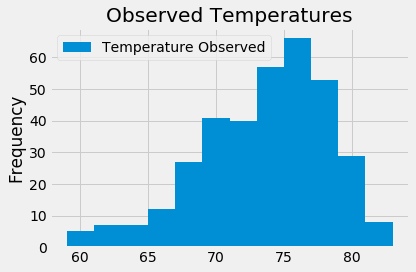

In [260]:
#Plot histogram
#realized table and work above was unneccessary -_-
temp_df.plot.hist(alpha=1, bins=12)
plt.title("Observed Temperatures")
plt.tight_layout()
plt.show()

![precipitation](Images/station-histogram.png)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


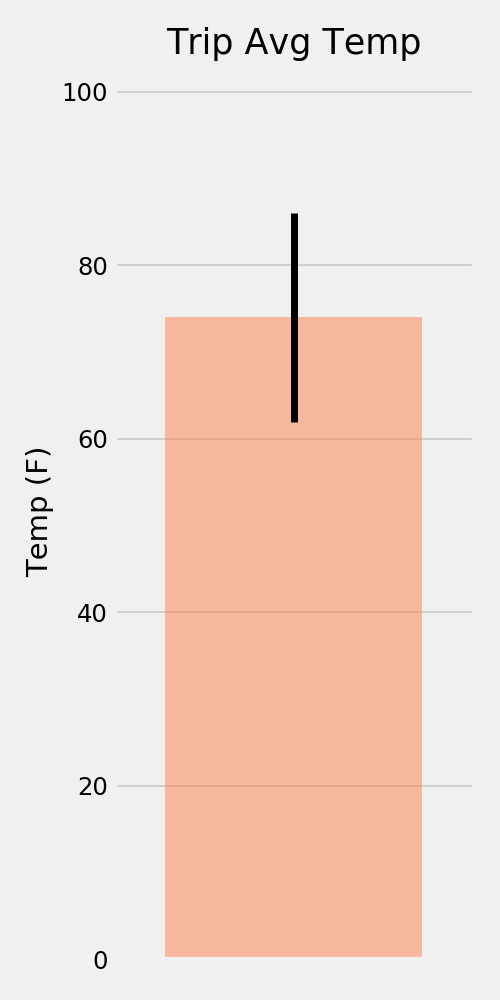

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


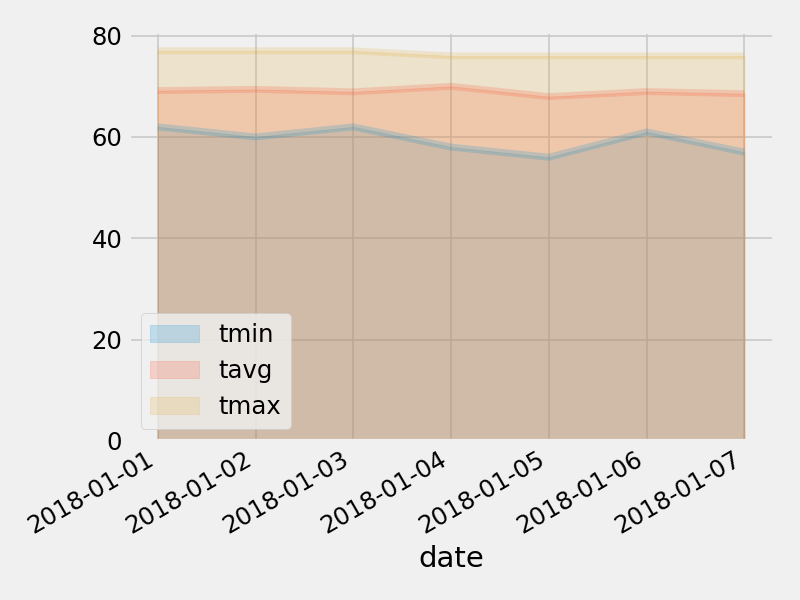

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
